In [2]:
#Please refer to the thesis document attached for all details about the project

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from minisom import MiniSom
from plotnine import *
import seaborn as sns

In [259]:
ds = pd.read_csv("C:\\Users\\haris\\OneDrive\\Desktop\\F21RP\\train_attributes.csv")

In [260]:
ds. drop("RMED", axis=1, inplace=True)

In [261]:
ds= ds.dropna()

In [262]:
ds

,WELL,DEPTH_MD,RHOB,GR,NPHI,RDEP
4238,15-09-2013,1138.7040,1.774626,55.892757,0.765867,1.091499
4239,15-09-2013,1138.8560,1.800986,60.929138,0.800262,1.122706
4240,15-09-2013,1139.0080,1.817696,62.117264,0.765957,1.148141
4241,15-09-2013,1139.1600,1.829333,61.010860,0.702521,1.170984
4242,15-09-2013,1139.3120,1.813854,58.501236,0.639708,1.184080
...,...,...,...,...,...,...
1044808,35/11-6,3969.1356,2.432940,40.133293,0.177768,4.854004
1044809,35/11-6,3969.2876,2.444900,41.122597,0.178800,4.840412
1044810,35/11-6,3969.4396,2.453794,41.430447,0.179523,4.930645
1044811,35/11-6,3969.5916,2.445429,43.105347,0.175777,5.142383


In [292]:
ds[['GR','RDEP','RHOB','NPHI','PC1','PC2']].var()

GR       1156.414386
RDEP    22342.001303
RHOB        0.055032
NPHI        0.017594
PC1     22366.829344
PC2      1131.588710
dtype: float64

In [268]:
snsds=ds.drop(["DEPTH_MD","WELL"], axis=1)

In [269]:
snsds

,RHOB,GR,NPHI,RDEP
4238,1.774626,55.892757,0.765867,1.091499
4239,1.800986,60.929138,0.800262,1.122706
4240,1.817696,62.117264,0.765957,1.148141
4241,1.829333,61.010860,0.702521,1.170984
4242,1.813854,58.501236,0.639708,1.184080
...,...,...,...,...
1044808,2.432940,40.133293,0.177768,4.854004
1044809,2.444900,41.122597,0.178800,4.840412
1044810,2.453794,41.430447,0.179523,4.930645
1044811,2.445429,43.105347,0.175777,5.142383


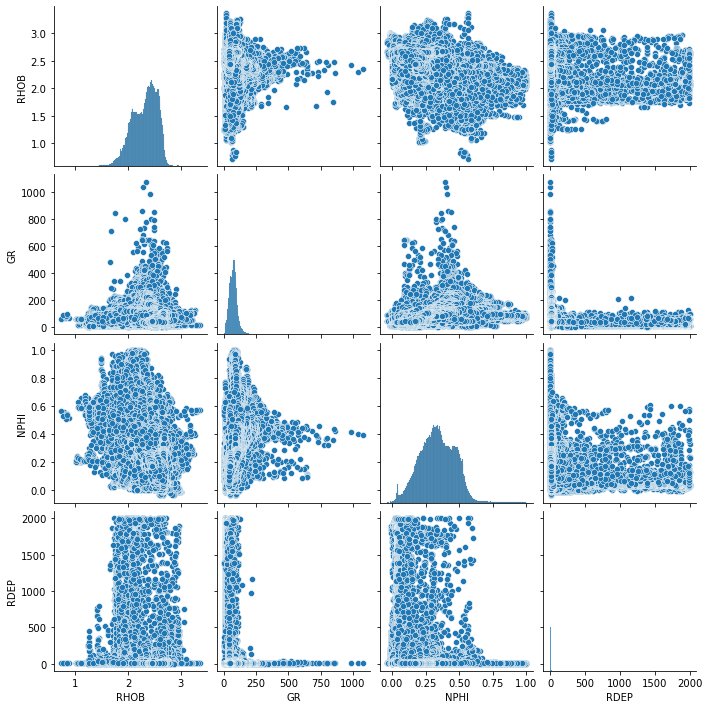

In [271]:
#exploratory data visualizations
sns.pairplot(snsds)
plt.savefig('Initiat_dataset_exploration.jpg',bbox_inches='tight', dpi=150)

In [ ]:
sns.scatterplot(data=PCA_well_log_ds, x="PC1", y="PC2")

In [264]:
#principal component analysis
pca = PCA(n_components=2)
PCA_well_log = pca.fit_transform(ds[['GR','RDEP','RHOB','NPHI']])
PCA_well_log_ds = pd.DataFrame(data = PCA_well_log
             , columns = ['PC1', 'PC2'])

In [274]:
PCA_well_log_ds.min()

PC1   -49.719387
PC2   -73.797890
dtype: float64

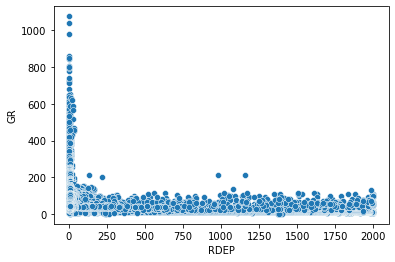

In [285]:
sns.scatterplot(data=ds, x="RDEP", y="GR")
plt.savefig('PCA_feature_extraction.jpg',bbox_inches='tight', dpi=150)

<function matplotlib.pyplot.show(close=None, block=None)>

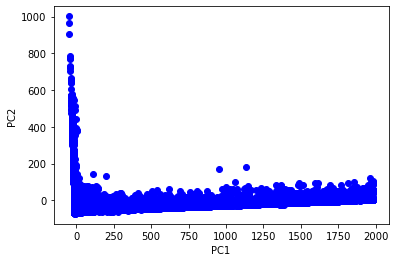

In [272]:
plt.scatter(PCA_well_log_ds['PC1'],PCA_well_log_ds['PC2'] , c ="blue")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show

C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


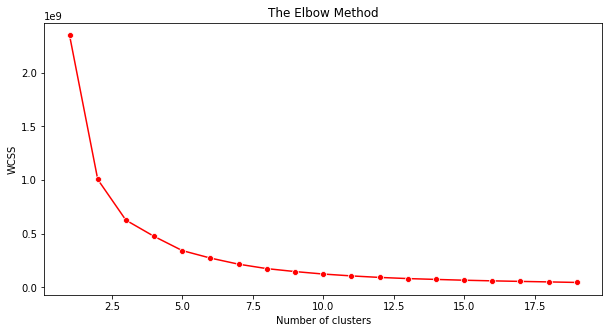

In [9]:
X=PCA_well_log_ds
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns the wcss for this model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 20), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

In [277]:
ds.reset_index(drop=True, inplace=True)
PCA_well_log_ds.reset_index(drop=True, inplace=True)

ds = pd.concat([ds, PCA_well_log_ds], axis=1)

In [257]:
ds1 = ds[ds['WELL'] == '15-09-2013']
ds2 = ds[ds['WELL'] == '15-09-2015']
ds3 = ds[ds['WELL'] == '15-09-2017']
ds4 = ds[ds['WELL'] == '16-01-2002']
ds5 = ds[ds['WELL'] == '16/1-6 A']
ds6 = ds[ds['WELL'] == '16-10-2001']
ds7 = ds[ds['WELL'] == '16-10-2002']
ds8 = ds[ds['WELL'] == '16-10-2003']
ds9 = ds[ds['WELL'] == '16-10-2005']
ds10 = ds[ds['WELL'] == '16/11-1 ST3']
ds11 = ds[ds['WELL'] == '16/2-11 A']
ds12 = ds[ds['WELL'] == '16-02-2016']
ds13 = ds[ds['WELL'] == '16-02-2006']
ds14 = ds[ds['WELL'] == '16-04-2001']
ds15 = ds[ds['WELL'] == '16-05-2003']
ds16 = ds[ds['WELL'] == '16-07-2004']
ds17 = ds[ds['WELL'] == '16-07-2005']
ds18 = ds[ds['WELL'] == '16-08-2001']
ds19 = ds[ds['WELL'] == '17-11-2001']
ds20 = ds[ds['WELL'] == '25-11-2015']
ds21 = ds[ds['WELL'] == '25/11-19 S']
ds22 = ds[ds['WELL'] == '25-11-2005']
ds23 = ds[ds['WELL'] == '25/2-13 T4']
ds24 = ds[ds['WELL'] == '25-02-2014']
ds25 = ds[ds['WELL'] == '25-02-2007']
ds26 = ds[ds['WELL'] == '25-03-2001']
ds27 = ds[ds['WELL'] == '25-04-2005']
ds28 = ds[ds['WELL'] == '25-05-2001']
ds29 = ds[ds['WELL'] == '25-05-2004']
ds30 = ds[ds['WELL'] == '25-06-2001']
ds31 = ds[ds['WELL'] == '25-06-2002']
ds32 = ds[ds['WELL'] == '25-06-2003']
ds33 = ds[ds['WELL'] == '25-07-2002']
ds34 = ds[ds['WELL'] == '25/8-5 S']
ds35 = ds[ds['WELL'] == '25-08-2007']
ds36 = ds[ds['WELL'] == '25-09-2001']
ds37 = ds[ds['WELL'] == '26-04-2001']
ds38 = ds[ds['WELL'] == '29-06-2001']
ds39 = ds[ds['WELL'] == '30-03-2003']
ds40 = ds[ds['WELL'] == '30/3-5 S']
ds41 = ds[ds['WELL'] == '30-06-2005']
ds42 = ds[ds['WELL'] == '31/2-1']
ds43 = ds[ds['WELL'] == '31/2-19 S']
ds44 = ds[ds['WELL'] == '31/2-7']
ds45 = ds[ds['WELL'] == '31/2-8']
ds46 = ds[ds['WELL'] == '31/2-9']
ds47 = ds[ds['WELL'] == '31-03-2001']
ds48 = ds[ds['WELL'] == '31-03-2002']
ds49 = ds[ds['WELL'] == '31-03-2003']
ds50 = ds[ds['WELL'] == '31-03-2004']
ds51 = ds[ds['WELL'] == '31/4-10']
ds52 = ds[ds['WELL'] == '31/4-5']
ds53 = ds[ds['WELL'] == '31/5-4 S']
ds54 = ds[ds['WELL'] == '31/6-5']
ds55 = ds[ds['WELL'] == '31/6-8']
ds56 = ds[ds['WELL'] == '32/2-1']
ds57 = ds[ds['WELL'] == '33/5-2']
ds58 = ds[ds['WELL'] == '33/6-3 S']
ds59 = ds[ds['WELL'] == '33/9-1']
ds60 = ds[ds['WELL'] == '33/9-17']
ds61 = ds[ds['WELL'] == '34/10-19']
ds62 = ds[ds['WELL'] == '34/10-21']
ds63 = ds[ds['WELL'] == '34/10-33']
ds64 = ds[ds['WELL'] == '34/10-35']
ds65 = ds[ds['WELL'] == '34/11-1']
ds66 = ds[ds['WELL'] == '34/11-2 S']
ds67 = ds[ds['WELL'] == '34/12-1']
ds68 = ds[ds['WELL'] == '34/2-4']
ds69 = ds[ds['WELL'] == '34/3-1 A']
ds70 = ds[ds['WELL'] == '34/4-10 R']
ds71 = ds[ds['WELL'] == '34/5-1 A']
ds72 = ds[ds['WELL'] == '34/5-1 S']
ds73 = ds[ds['WELL'] == '34/7-13']
ds74 = ds[ds['WELL'] == '34/7-20']
ds75 = ds[ds['WELL'] == '34/7-21']
ds76 = ds[ds['WELL'] == '34/8-1']
ds77 = ds[ds['WELL'] == '34/8-3']
ds78 = ds[ds['WELL'] == '34/8-7 R']
ds79 = ds[ds['WELL'] == '35/11-1']
ds80 = ds[ds['WELL'] == '35/11-10']
ds81 = ds[ds['WELL'] == '35/11-11']
ds82 = ds[ds['WELL'] == '35/11-12']
ds83 = ds[ds['WELL'] == '35/11-13']
ds84 = ds[ds['WELL'] == '35/11-15 S']
ds85 = ds[ds['WELL'] == '35/11-6']

C:\Users\haris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


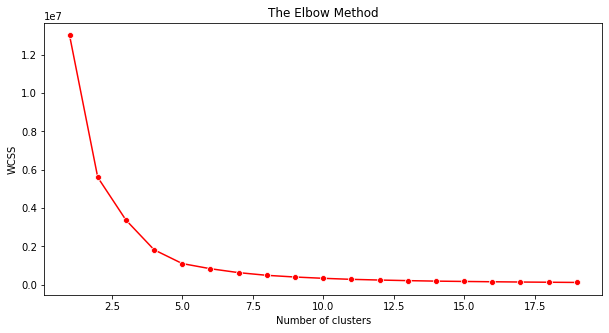

In [15]:
#Elbow method to find optimum number of clusters
attributes = ["PC1", "PC2"]
X=ds1[attributes]
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns the wcss for this model
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 20), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

In [278]:
#KMeans clustering in 2 dimensions
attributes = ["PC1", "PC2"]
X=ds[attributes]
model=KMeans(n_clusters=5)
model.fit(X)
clusters=model.fit_predict(X)

In [17]:
#DBSCAN clustering in 2 dimensions
attributes = ["PC1", "PC2"]
X=ds1[attributes]

dbscan_cluster = DBSCAN(eps=1, min_samples=8)
dbscan_cluster.fit(X)


labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identifying Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 9
Estimated no. of noise points: 374


In [279]:
#Kohonen self organizing maps using minisom package
attributes = ["PC1", "PC2"]
X=ds[attributes]
X=np.array(X)
# Initialization and training
som_shape = (1, 5)
som = MiniSom(som_shape[0], som_shape[1], X.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(X, 50000, verbose=True)


 [   483 / 50000 ]   1% - 0:00:35 left 

 [  1401 / 50000 ]   3% - 0:00:18 left 

 [  2502 / 50000 ]   5% - 0:00:13 left 

 [  3645 / 50000 ]   7% - 0:00:12 left 

 [  4852 / 50000 ]  10% - 0:00:10 left 

 [  6005 / 50000 ]  12% - 0:00:09 left 

 [  7227 / 50000 ]  14% - 0:00:09 left 

 [  8334 / 50000 ]  17% - 0:00:08 left 

 [  9558 / 50000 ]  19% - 0:00:08 left 

 [ 10823 / 50000 ]  22% - 0:00:07 left 

 [ 11995 / 50000 ]  24% - 0:00:07 left 

 [ 13240 / 50000 ]  26% - 0:00:07 left 

 [ 14381 / 50000 ]  29% - 0:00:06 left 

 [ 15100 / 50000 ]  30% - 0:00:06 left 

 [ 16320 / 50000 ]  33% - 0:00:06 left 

 [ 17497 / 50000 ]  35% - 0:00:06 left 

 [ 18566 / 50000 ]  37% - 0:00:06 left 

 [ 19754 / 50000 ]  40% - 0:00:05 left 

 [ 20922 / 50000 ]  42% - 0:00:05 left 

 [ 22219 / 50000 ]  44% - 0:00:05 left 

 [ 23407 / 50000 ]  47% - 0:00:05 left 

 [ 24675 / 50000 ]  49% - 0:00:04 left 

 [ 25685 / 50000 ]  51% - 0:00:04 left 

 [ 26443 / 50000 ]  53% - 0:00:04 left 

 [ 27742 / 50000 ]  55% - 0:00:04 left 

 [ 28959 / 50000 ]  58% - 0:00:03 left 

 [ 30158 / 50000 ]  60% - 0:00:03 left 

 [ 31285 / 50000 ]  63% - 0:00:03 left 

 [ 32550 / 50000 ]  65% - 0:00:03 left 

 [ 33202 / 50000 ]  66% - 0:00:03 left 

 [ 34293 / 50000 ]  69% - 0:00:02 left 

 [ 35585 / 50000 ]  71% - 0:00:02 left 

 [ 36451 / 50000 ]  73% - 0:00:02 left 

 [ 37643 / 50000 ]  75% - 0:00:02 left 

 [ 38902 / 50000 ]  78% - 0:00:02 left 

 [ 40175 / 50000 ]  80% - 0:00:01 left 

 [ 41349 / 50000 ]  83% - 0:00:01 left 

 [ 42581 / 50000 ]  85% - 0:00:01 left 

 [ 43698 / 50000 ]  87% - 0:00:01 left 

 [ 44506 / 50000 ]  89% - 0:00:01 left 

 [ 45662 / 50000 ]  91% - 0:00:00 left 

 [ 46908 / 50000 ]  94% - 0:00:00 left 

 [ 48152 / 50000 ]  96% - 0:00:00 left 

 [ 49272 / 50000 ]  99% - 0:00:00 left 

 [ 50000 / 50000 ] 100% - 0:00:00 left 


 quantization error: 31.946552222380546


In [280]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [281]:
cluster_index

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

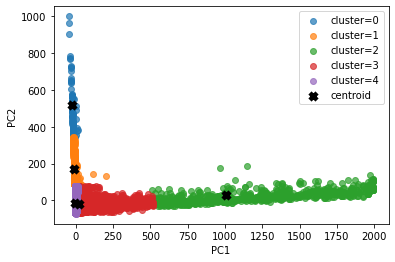

In [125]:
# plotting the som clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=10, color='k', label='centroid')
    
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend();

Text(0, 0.5, 'PC2')

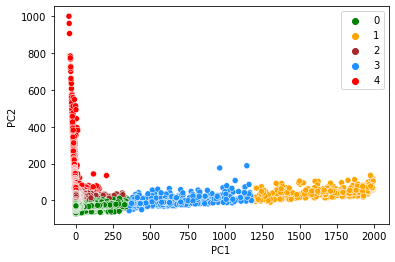

In [128]:
#viewing the k means clusters formed in 2 dimensions
sns.scatterplot(data = ds, x = ds.iloc[:, 6], y = ds.iloc[:, 7], hue=clusters, palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [282]:
z=ds

#linking the k means clusters formed in 2d with the data points in the original 4d dataset
z['KMEANSCLUSTER'] = pd.Series(clusters, index=z.index)

#linking the dbscan clusters formed in 2d with the data points in the original 4d dataset
#z['DBSCANCLUSTER'] = pd.Series(labels, index=z.index)

#linking the som clusters formed in 2d with the data points in the original 4d dataset
z['SOMCLUSTER'] = pd.Series(cluster_index, index=z.index)

In [283]:
ds

,WELL,DEPTH_MD,RHOB,GR,NPHI,RDEP,PC1,PC2,KMEANSCLUSTER,SOMCLUSTER
0,15-09-2013,1138.7040,1.774626,55.892757,0.765867,1.091499,-14.785428,-18.953503,0,4
1,15-09-2013,1138.8560,1.800986,60.929138,0.800262,1.122706,-14.926455,-13.918956,0,4
2,15-09-2013,1139.0080,1.817696,62.117264,0.765957,1.148141,-14.941657,-12.730667,0,4
3,15-09-2013,1139.1600,1.829333,61.010860,0.702521,1.170984,-14.880987,-13.835678,0,4
4,15-09-2013,1139.3120,1.813854,58.501236,0.639708,1.184080,-14.782074,-16.343445,0,4
...,...,...,...,...,...,...,...,...,...,...
653862,35/11-6,3969.1356,2.432940,40.133293,0.177768,4.854004,-10.486239,-34.574963,0,4
653863,35/11-6,3969.2876,2.444900,41.122597,0.178800,4.840412,-10.533651,-33.586693,0,4
653864,35/11-6,3969.4396,2.453794,41.430447,0.179523,4.930645,-10.453999,-33.275930,0,4
653865,35/11-6,3969.5916,2.445429,43.105347,0.175777,5.142383,-10.299652,-31.594780,0,4


In [251]:
#function for plotting the well logs

def log_plot(logs):
    logs = logs.sort_values(by='DEPTH_MD')
    top = logs.DEPTH_MD.min()
    bot = logs.DEPTH_MD.max()
    d=((logs.DEPTH_MD.max())-(logs.DEPTH_MD.min()))/20
       
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(20,d))
    ax[0].plot(logs.GR, logs.DEPTH_MD, color='green')
    ax[1].plot(logs.RDEP, logs.DEPTH_MD, color='red')
    ax[2].plot(logs.NPHI, logs.DEPTH_MD, color='blue')
    ax[3]=ax[2].twiny()
    ax[3].plot(logs.RHOB, logs.DEPTH_MD, color='c')
    ax[4].plot(logs.KMEANSCLUSTER, logs.DEPTH_MD, color='black')
    ax[5].plot(logs.SOMCLUSTER, logs.DEPTH_MD, color='purple')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR (API)")
    ax[0].set_xlim(0, 150)
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("RT (ohm.m)")
    ax[1].set_xlim(0.2,20)
    ax[2].set_xlabel("NPHI (v/v)")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("RHOB (g/cm3)")
    ax[3].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[4].set_xlabel("K-Means")
    ax[4].set_xlim(-1,6)
    ax[5].set_xlabel("SOM")
    ax[5].set_xlim(-1,6)
    
    


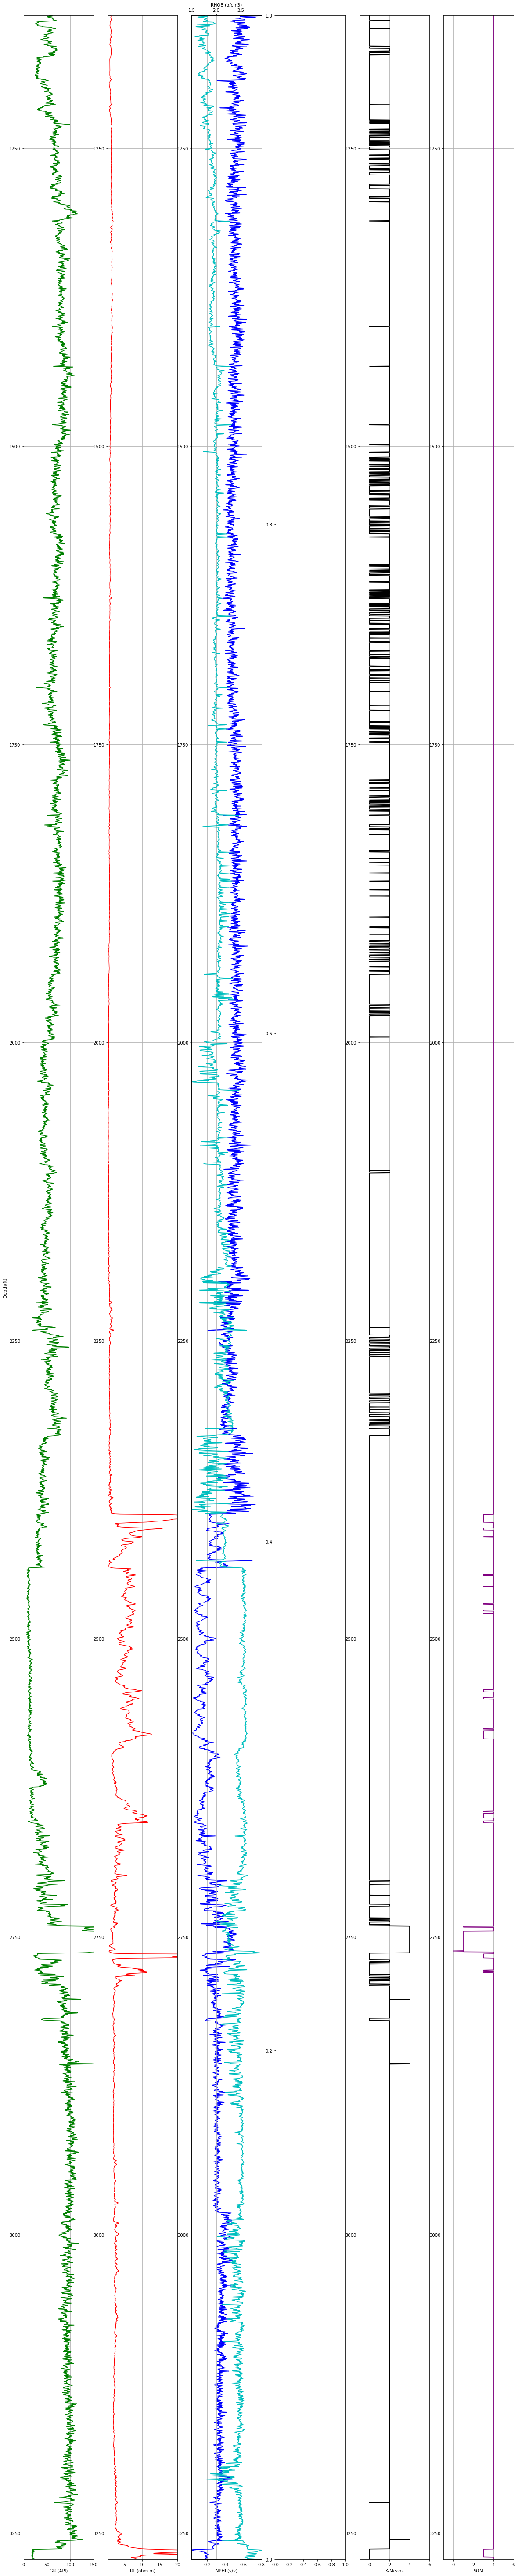

In [252]:
#takes input as one of the well log datasets and plots it
log_plot(ds10)
#plt.savefig('ds10_well_log_plot.jpg',bbox_inches='tight', dpi=150)

In [34]:
#finding ranges of parameters in X axis
dataset=ds12
RHOB_MAX=dataset["RHOB"].max()
RHOB_MIN=dataset["RHOB"].min()
NPHI_MAX=dataset["NPHI"].max()
NPHI_MIN=dataset["NPHI"].min()
print("max RHOB = ")
print(RHOB_MAX)
print("min RHOB = ")
print(RHOB_MIN)
print("max NPHI = ")
print(NPHI_MAX)
print("min NPHI = ")
print(NPHI_MIN)
#finding ranges of parameter in y axis
DEPTH_MD_MAX=dataset["DEPTH_MD"].max()
DEPTH_MD_MIN=dataset["DEPTH_MD"].min()
print("max Depth = ")
print(DEPTH_MD_MAX)
print("min Depth = ")
print(DEPTH_MD_MIN)

max RHOB = 
2.74463439
min RHOB = 
1.732161045
max NPHI = 
0.749615371
min NPHI = 
0.003063568
max Depth = 
2206.246396
min Depth = 
705.5503961
